In [1]:

import numpy as np
import pandas as pd

import sklearn as sk
import sklearn.feature_extraction
import sklearn.preprocessing
import sklearn.linear_model

import IPython as IP

import matplotlib.pyplot as plt
%matplotlib inline

import pylab
# print (pylab.rcParams.keys())
pylab.rcParams['figure.figsize'] = (18.0, 8.0)
pylab.rcParams['figure.facecolor'] = "white"
pylab.rcParams['axes.facecolor'] = "white"
pylab.rcParams['font.family'] = "sans"

import matplotlib
matplotlib.style.use('ggplot') # temporary for incompatibility of pandas with matplotlib
# pd.options.display.mpl_style = 'default'

pd.set_option('display.max_rows', 100)

In [2]:
% load_ext autoreload
% autoreload 2

In [3]:
from evaluate import rolling_crossval
from pandas.tseries.offsets import DateOffset

In [4]:
from recommenders import SVDRecommender, FMRecommender, MostPopularRecommender

In [5]:
input_file_path = "../input/orders_items_registrations.3.csv"

open('crossval_log', 'w')

rolling_crossval(input_file_path, SVDRecommender, step=DateOffset(months=0, days=7), 
                       start_offset=DateOffset(months=13))
rolling_crossval(input_file_path, MostPopularRecommender, step=DateOffset(months=0, days=7), 
                       start_offset=DateOffset(months=13))
rolling_crossval(input_file_path, FMRecommender, step=DateOffset(months=0, days=7), 
                       start_offset=DateOffset(months=13))


In [6]:
from json import loads

fold_accuracies = list()
with open('crossval_log') as f:
    for l in f.readlines():
        fold_accuracies.append(loads(l))
fold_accuracies = pd.DataFrame(fold_accuracies).sort_values('train_end_date')

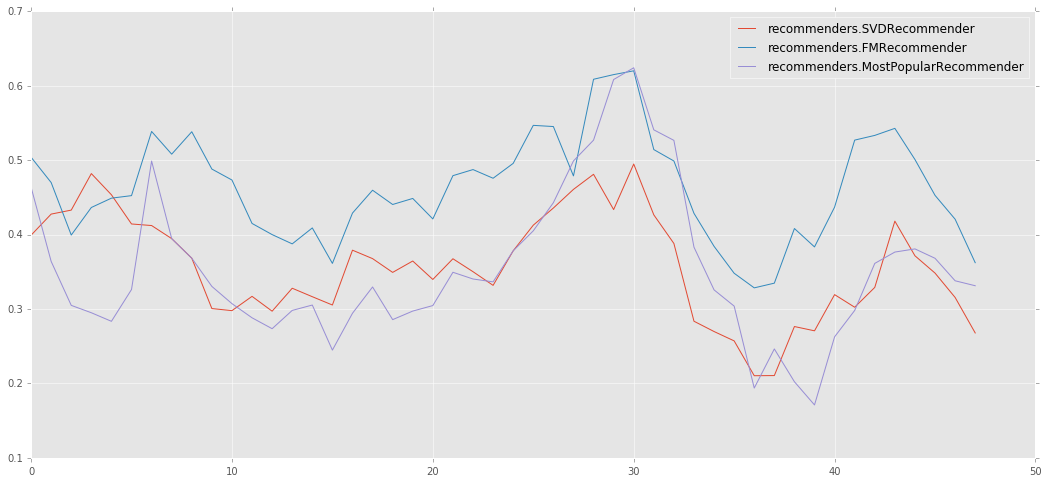

In [7]:
for recommender in fold_accuracies.RecommenderClass.unique():
    data = fold_accuracies[fold_accuracies.RecommenderClass == recommender].reset_index()
    plt.plot(data.accuracy, label=recommender)

plt.legend()
plt.show()